We show that the mass is a golden feature for the kaggle problem, dividing properly the signal from background.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sbs

import lightgbm as lgb

from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import StratifiedKFold

%matplotlib inline
np.random.seed(2210)

plt.rcParams['figure.figsize'] = [10, 6]
font_size = 24

In [2]:
path = '../../Data/kaggleFlavorPhysics/'
data = pd.read_csv(path+'training.csv',index_col='id')
data.head()

,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
id,,,,,,,,,,,,,,,,,,,,,
18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


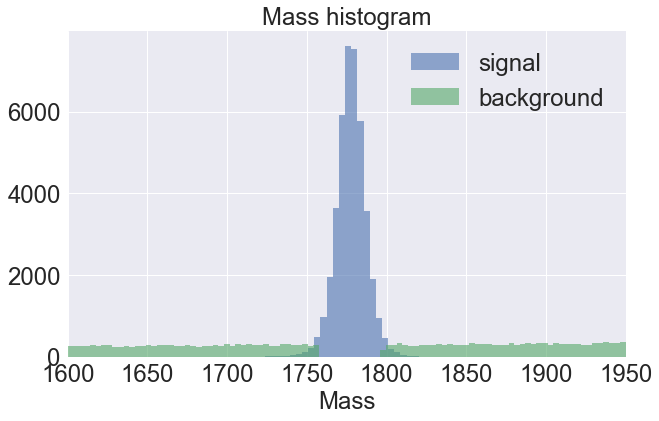

In [3]:
plt.hist(data[data['signal']==1]['mass'],bins=100,alpha=0.6,
         label='signal');
plt.hist(data[data['signal']==0]['mass'],bins=100,alpha=0.6,
         label='background');
plt.xlim(1600,1950)
plt.legend(fontsize=font_size)
plt.tick_params(labelsize=font_size)
plt.xlabel('Mass',fontsize=font_size)
plt.title('Mass histogram',fontsize=font_size)
plt.savefig('GoldenFeature.pdf')